<a href="https://colab.research.google.com/github/codebuzer/Bioactivity-Prediction-App/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np

In [85]:
test = pd.read_csv("/content/drive/MyDrive/test (1).csv", index_col = 0)

In [86]:
train = pd.read_csv("/content/drive/MyDrive/train (2).csv", index_col = 0)

In [87]:
test.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status,infection
15,-0.033934,0.146984,-0.103450,0.359065,-0.077844,0.356982,0.084615,0.169465,0.474751,0.234196,...,0,0,0,0,0,0,0,0,1,1
461,-0.322663,0.061436,0.103393,-0.092681,0.137921,-0.176736,-0.167565,0.129200,-0.229801,0.052752,...,0,0,0,0,0,0,0,1,0,0
9,0.090296,0.025471,-0.158836,0.139533,-0.081311,0.367960,0.194679,-0.023078,0.237585,0.048887,...,0,0,0,0,0,0,0,0,0,1
180,-0.046162,-0.046602,-0.345149,-0.248704,-0.250963,-0.207227,0.133169,-0.181865,-0.288158,-0.266543,...,0,0,0,1,0,0,0,0,1,1
101,0.653075,0.268262,0.239348,0.096112,0.116021,0.368272,0.484395,-0.057752,-0.056999,0.273912,...,0,0,0,0,0,0,0,0,1,1


In [88]:
train.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status,infection
553,-0.028495,0.133290,0.237421,-0.104619,0.286065,0.176949,-0.341158,0.247078,-0.214672,0.004792,...,0,0,0,0,0,0,0,0,1,0
71,0.588445,0.093813,0.058787,-0.104408,0.002031,0.113501,0.387815,-0.215535,-0.152562,0.058738,...,0,0,0,0,0,0,0,0,1,1
594,0.141827,0.041907,0.161903,0.073829,0.148201,0.030421,-0.123261,0.152078,-0.184436,0.011392,...,0,0,0,0,0,0,0,0,1,0
115,0.317654,0.065564,0.105366,0.067780,0.108996,0.103936,0.254456,-0.126160,0.048068,0.217763,...,0,0,0,0,0,0,0,0,0,1
486,0.041571,0.106831,0.168387,-0.030520,0.374121,0.055543,-0.239076,0.303363,0.147750,0.037137,...,0,0,0,0,0,0,0,0,1,0


In [89]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_D', 'batch_E',
       'batch_F', 'batch_G', 'batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T', 'batch_U', 'ctnum_median_status',
       'infection'],
      dtype='object')

In [90]:
test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'agenum_random', 'ctnum_random', 'batch_A', 'batch_B', 'batch_C',
       'batch_E', 'batch_F', 'batch_G', 'batch_H', 'batch_I', 'batch_J',
       'batch_K', 'batch_L', 'batch_M', 'batch_N', 'batch_O', 'batch_P',
       'batch_Q', 'batch_R', 'batch_S', 'batch_T', 'batch_U',
       'ctnum_median_status', 'infection'],
      dtype='object')

In [91]:
X_train = train.drop(['ctnum_random'], axis = 1)

In [92]:
y_train = train['ctnum_random']

In [93]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'batch_A', 'batch_B', 'batch_C', 'batch_D', 'batch_E', 'batch_F',
       'batch_G', 'batch_H', 'batch_I', 'batch_J', 'batch_K', 'batch_L',
       'batch_M', 'batch_N', 'batch_O', 'batch_P', 'batch_Q', 'batch_R',
       'batch_S', 'batch_T', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [94]:
y_train

0      22.810000
1      19.350000
2      21.340000
3      25.360000
4      24.410000
         ...    
647    22.481452
648    23.230031
649    21.019534
650    20.887817
651    17.436041
Name: ctnum_random, Length: 652, dtype: float64

In [95]:
X_test = test.drop(['ctnum_random'], axis = 1)

In [96]:
y_test = test['ctnum_random']

In [97]:
X_test.shape, y_test.shape, X_train.shape,y_train.shape

((121, 73), (121,), (652, 73), (652,))

In [98]:
X_train_non_negative  = X_train.iloc[:,49:]
X_train_non_negative

,agenum_random,batch_A,batch_B,batch_C,batch_D,batch_E,batch_F,batch_G,batch_H,batch_I,...,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status,infection
0,50.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,62.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,72.000000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,30.000000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,35.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,64.999349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
648,40.333857,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
649,63.848260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,14.968711,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'batch_A', 'batch_B', 'batch_C', 'batch_D', 'batch_E', 'batch_F',
       'batch_G', 'batch_H', 'batch_I', 'batch_J', 'batch_K', 'batch_L',
       'batch_M', 'batch_N', 'batch_O', 'batch_P', 'batch_Q', 'batch_R',
       'batch_S', 'batch_T', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [100]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [101]:
train.shape

(652, 74)

In [102]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [103]:
print(model.feature_importances_)

[4.88441826e-03 3.16962557e-03 8.80939106e-03 5.24357431e-03
 5.81202325e-03 6.69233606e-03 6.05068151e-03 3.95950367e-03
 6.19212702e-03 2.72932560e-03 5.19191283e-03 6.11906292e-03
 4.74775484e-03 3.82080770e-03 1.39846433e-02 6.86636922e-03
 4.39842389e-03 1.43456677e-02 4.64810085e-03 1.53212281e-02
 5.88656548e-03 5.39143298e-03 8.07963655e-03 6.73050166e-03
 6.98544259e-03 4.94880725e-03 3.59113268e-03 4.76652458e-03
 4.60501718e-03 5.51609217e-03 6.06465723e-03 5.71865611e-03
 4.30038017e-03 5.83690456e-03 6.93903945e-03 3.96557195e-03
 7.77765927e-03 6.09183918e-03 5.65510934e-03 5.70131947e-03
 5.46852487e-03 3.97638961e-03 1.15051748e-02 5.00723949e-03
 3.83318706e-03 5.66295059e-03 4.07434086e-03 9.70624534e-03
 6.20296684e-03 1.83274235e-02 1.33864904e-02 4.33476277e-03
 2.91322975e-03 1.17219785e-03 1.11841161e-03 8.16400658e-04
 1.79956688e-03 9.02136654e-04 3.20470614e-04 8.42491588e-04
 3.94850036e-04 1.83839380e-03 7.40543419e-04 4.20561032e-04
 3.86646215e-03 1.173944

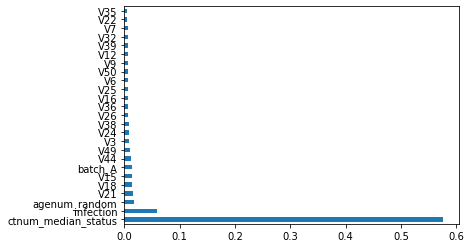

In [104]:
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(25).plot(kind='barh')
plt.show()


Corelation

In [105]:
X_train.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status,infection
V1,1.000000,0.652516,0.357783,0.089957,0.134473,0.415168,0.731832,-0.036476,0.052647,0.666189,...,-0.027176,-0.017595,0.015219,0.093200,0.008231,0.051165,-0.004307,-0.087148,-0.074823,0.013595
V2,0.652516,1.000000,0.705606,0.300177,0.509460,0.646370,0.294834,0.497824,0.200378,0.756800,...,-0.024340,-0.001955,0.018020,0.070377,-0.123224,0.216512,-0.026660,0.127038,-0.116323,-0.276822
V3,0.357783,0.705606,1.000000,0.245690,0.580164,0.551442,-0.030611,0.579463,0.070185,0.594196,...,-0.039992,-0.055139,-0.007462,0.004819,-0.160393,0.310699,-0.009086,0.153422,-0.133886,-0.376104
V4,0.089957,0.300177,0.245690,1.000000,0.143147,0.681606,0.166748,0.373133,0.724383,0.483934,...,0.101760,0.067305,0.094566,0.054154,-0.015713,0.000744,-0.113524,0.001309,-0.026242,0.034568
V5,0.134473,0.509460,0.580164,0.143147,1.000000,0.275986,-0.202476,0.651338,0.101739,0.404044,...,-0.020114,-0.025983,-0.051722,0.010853,-0.220483,0.372466,-0.020137,0.188073,-0.043292,-0.391581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
batch_S,0.051165,0.216512,0.310699,0.000744,0.372466,0.115092,-0.164145,0.315299,0.048499,0.178556,...,-0.031200,-0.041264,-0.060890,-0.063287,-0.056726,1.000000,-0.026546,-0.068640,0.003714,-0.238172
batch_T,-0.004307,-0.026660,-0.009086,-0.113524,-0.020137,-0.125733,-0.000708,0.046570,-0.094151,-0.014139,...,-0.014601,-0.019310,-0.028494,-0.029616,-0.026546,-0.026546,1.000000,-0.032121,-0.016667,0.055728
batch_U,-0.087148,0.127038,0.153422,0.001309,0.188073,0.019458,-0.172911,0.236298,-0.075197,0.131958,...,-0.037753,-0.049930,-0.073679,-0.076579,-0.068640,-0.068640,-0.032121,1.000000,0.075673,-0.288195
ctnum_median_status,-0.074823,-0.116323,-0.133886,-0.026242,-0.043292,-0.171244,-0.083210,-0.109011,-0.094329,-0.077795,...,0.049240,-0.046531,-0.025382,-0.028866,-0.092047,0.003714,-0.016667,0.075673,1.000000,0.083250


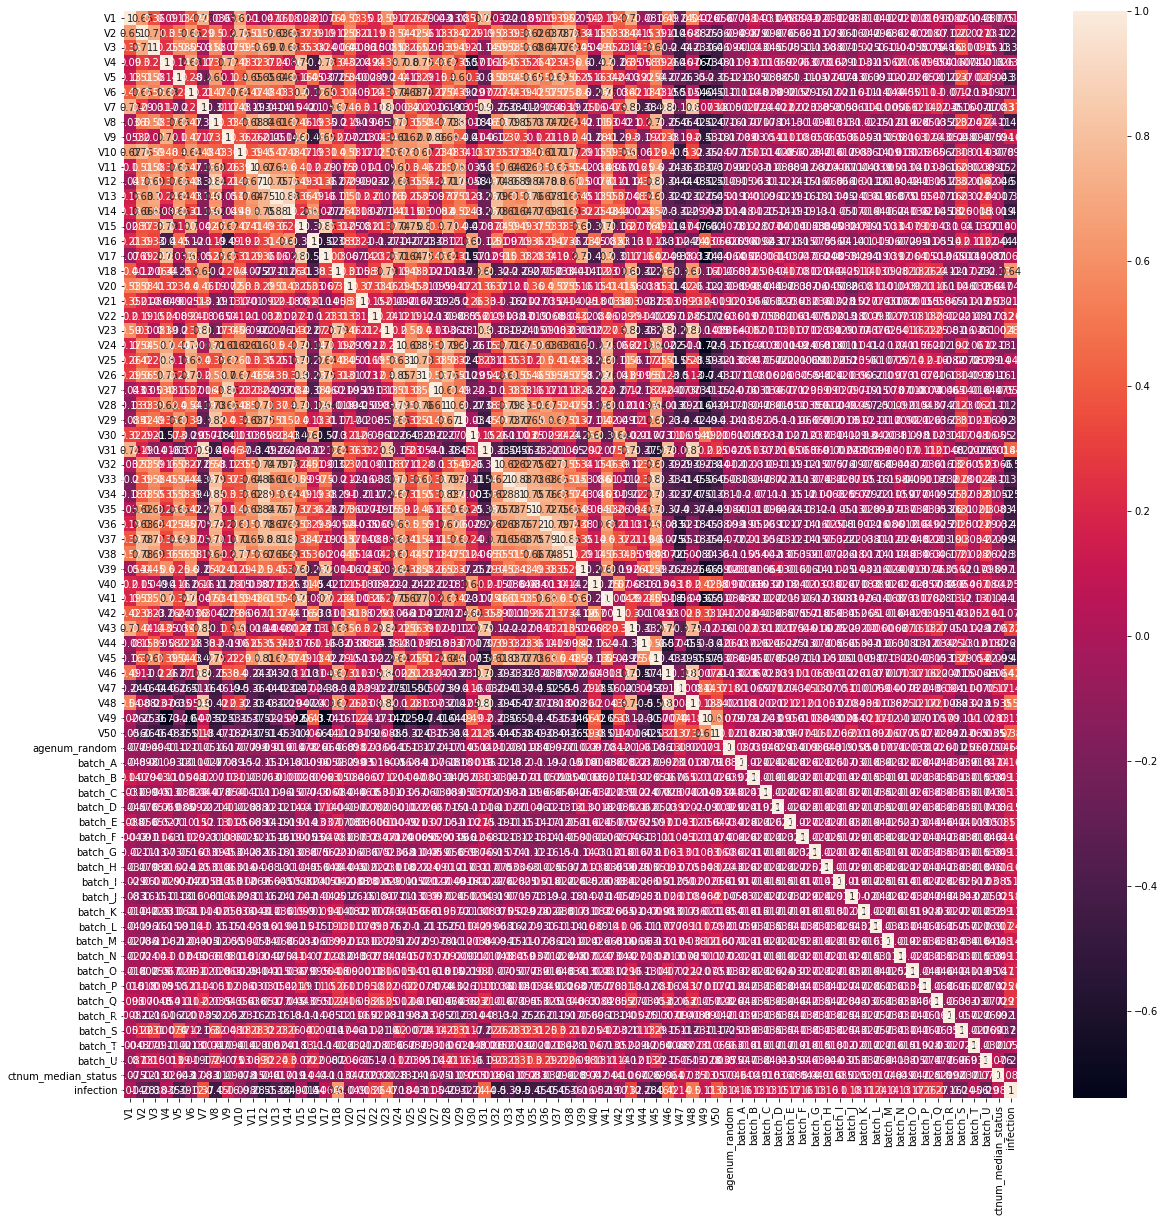

In [106]:
import seaborn as sns
corr=X_train.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X_train[top_features].corr(),annot=True)

In [107]:
#### Remove The correlated

In [108]:
threshold=0.85

In [109]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [110]:
corr_features = correlation(X_train,threshold)


In [111]:
corr_features = list(corr_features)

In [112]:
X_train = X_train.drop(['V38', 'V27', 'V34', 'V14', 'V17', 'V33', 'V48', 'V31','batch_D'], axis = 1)

In [113]:
X_train.shape

(652, 64)

In [114]:
X_test = X_test.drop(['V38', 'V27', 'V34', 'V14', 'V17', 'V33', 'V48', 'V31','V19'], axis = 1)

In [115]:
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((121, 64), (652, 64), (121,), (652,))

In [116]:
X_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V15', 'V16', 'V18', 'V20', 'V21', 'V22', 'V23', 'V24',
       'V25', 'V26', 'V28', 'V29', 'V30', 'V32', 'V35', 'V36', 'V37', 'V39',
       'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V49', 'V50',
       'agenum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F',
       'batch_G', 'batch_H', 'batch_I', 'batch_J', 'batch_K', 'batch_L',
       'batch_M', 'batch_N', 'batch_O', 'batch_P', 'batch_Q', 'batch_R',
       'batch_S', 'batch_T', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [117]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V15', 'V16', 'V18', 'V20', 'V21', 'V22', 'V23', 'V24',
       'V25', 'V26', 'V28', 'V29', 'V30', 'V32', 'V35', 'V36', 'V37', 'V39',
       'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V49', 'V50',
       'agenum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F',
       'batch_G', 'batch_H', 'batch_I', 'batch_J', 'batch_K', 'batch_L',
       'batch_M', 'batch_N', 'batch_O', 'batch_P', 'batch_Q', 'batch_R',
       'batch_S', 'batch_T', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')